In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "C:/Windows/Fonts/MALGUN.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rc('xtick', labelsize=10)
mpl.rcParams['axes.unicode_minus'] = False

In [25]:
train = pd.read_csv("../data/dacon_prarking_demand_dataset/train.csv")
test = pd.read_csv("../data/dacon_prarking_demand_dataset/test.csv")
sub = pd.read_csv("../data/dacon_prarking_demand_dataset/test.csv")
age = pd.read_csv("../data/dacon_prarking_demand_dataset/age_gender_info.csv")

In [26]:
train.shape, test.shape, sub.shape, age.shape

((2952, 15), (1022, 14), (1022, 14), (16, 23))

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [28]:
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

### train set
임대보증금 : 569개 
임대료 : 569개
도보 10분거리 내 지하철역 수 : 211개
도보 10분거리 내 버스정류장 수 : 4개

### test set
임대보증금, 임대료, 지하철역 수 피처가 결측값 존재

<AxesSubplot:>

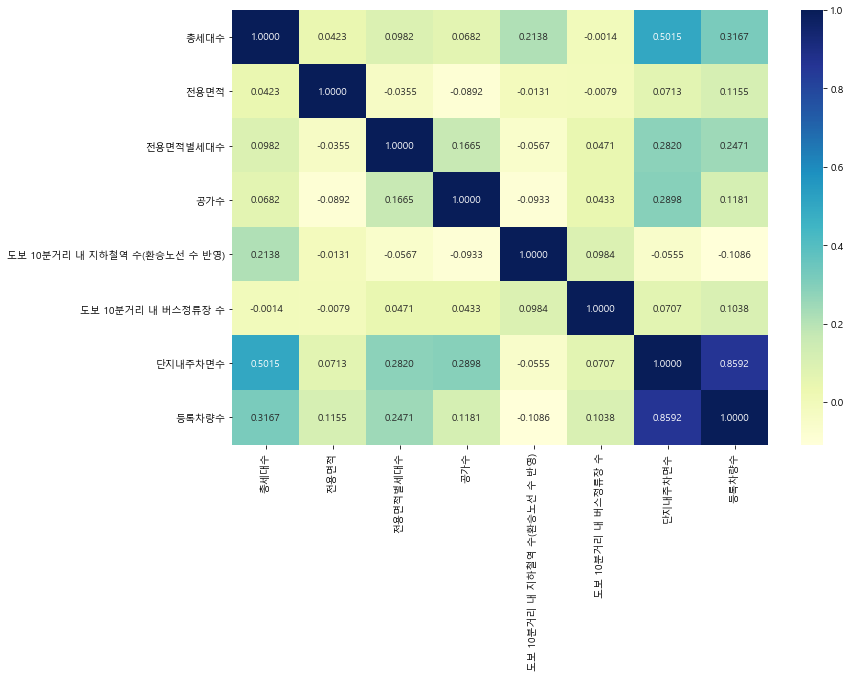

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, fmt=".4f", cmap='YlGnBu')

In [36]:
train.head(10)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
5,C2483,900,아파트,경상북도,국민임대,51.95,89,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
6,C2483,900,아파트,경상북도,국민임대,51.95,135,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
7,C2483,900,아파트,경상북도,국민임대,59.88,86,38.0,A,30357000,214270,0.0,3.0,1425.0,1015.0
8,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
9,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0


In [37]:
train["단지코드"].value_counts()

C1439    48
C2132    47
C1859    40
C1790    33
C2597    32
         ..
C1502     2
C2188     1
C2340     1
C2520     1
C2437     1
Name: 단지코드, Length: 423, dtype: int64

In [38]:
train["등록차량수"].value_counts()

359.0    61
172.0    48
62.0     44
116.0    40
120.0    33
         ..
235.0     2
670.0     2
149.0     2
16.0      1
386.0     1
Name: 등록차량수, Length: 354, dtype: int64

In [44]:
train["전용면적별세대수"][train["단지코드"] == "C2483"].sum()

900

In [53]:
train.groupby("자격유형")["임대건물구분"].count()

자격유형
A    1801
B      21
C      95
D     569
E      37
F       3
G       9
H     155
I      49
J     114
K      33
L      33
M       2
N      30
O       1
Name: 임대건물구분, dtype: int64

In [54]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

<AxesSubplot:xlabel='단지코드', ylabel='Count'>

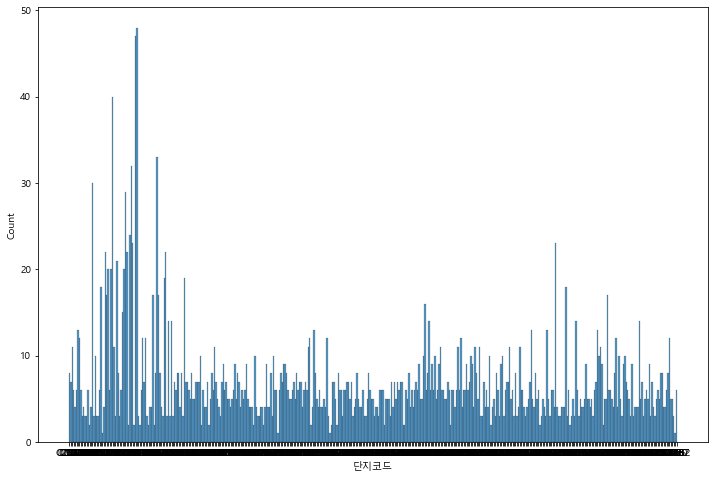

In [57]:
plt.figure(figsize=(12, 8))
sns.histplot(x="단지코드", data=train)

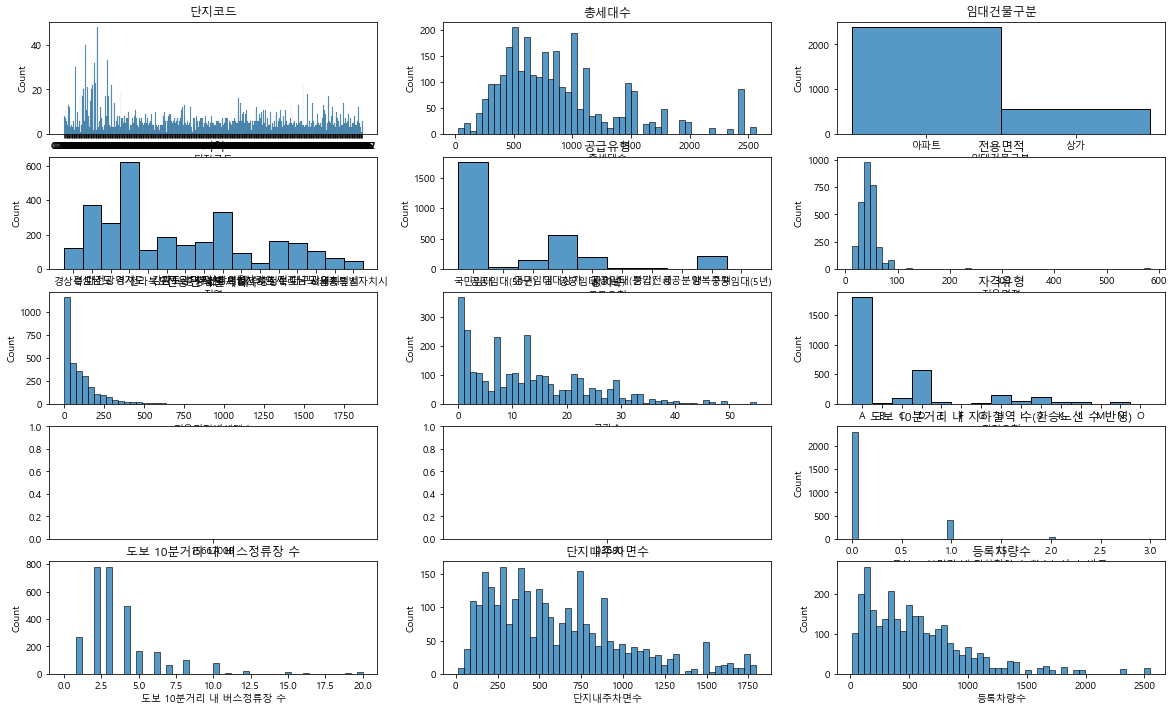

In [67]:
plt.figure(figsize=(20, 12)) # 3 * 5 = 15
for i in range(len(train.columns)):
    try:
        plt.subplot(5, 3, i+1)
        sns.histplot(x=train.columns[i], data=train, bins=50)
        plt.title("{}".format(train.columns[i]))
    except:
        continue

In [64]:
from sklearn.linear_model import LinearRegression

sel = ['총세대수']
X_train = train[sel]
X_test = test[sel]
y_train = train['등록차량수']
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([524.31256846, 524.31256846, 524.31256846, ..., 424.88994317,
       424.88994317, 424.88994317])

In [75]:
code_number_registered = train.groupby("단지코드")["등록차량수"]
code_number_registered.value_counts()

단지코드   등록차량수 
C1000  481.0      7
C1004  93.0      19
C1005  376.0      3
C1013  1665.0     5
C1014  708.0      7
                 ..
C2663  652.0      6
C2666  701.0      6
C2670  435.0      5
C2680  590.0      3
C2692  437.0      5
Name: 등록차량수, Length: 423, dtype: int64

In [76]:
code_number_registered.transform(np.mean)

0       1015.0
1       1015.0
2       1015.0
3       1015.0
4       1015.0
         ...  
2947     146.0
2948     146.0
2949     146.0
2950     146.0
2951     146.0
Name: 등록차량수, Length: 2952, dtype: float64

In [77]:
test["등록차량수"] = pred
test["코드별차량수평균"] = test.groupby("단지코드")["등록차량수"].transform(np.mean)
test_new = test.drop_duplicates(["단지코드"], keep="first").reset_index()
test_new

,index,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,코드별차량수평균
0,0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0,524.312568,524.312568
1,8,C1128,1354,아파트,경기도,국민임대,39.79,368,9.0,H,22830000,189840,0.0,3.0,1216.0,684.671641,684.671641
2,17,C1456,619,아파트,부산광역시,국민임대,33.40,82,18.0,A,19706000,156200,0.0,16.0,547.0,488.231777,488.231777
3,26,C1840,593,아파트,전라북도,국민임대,39.57,253,7.0,A,14418000,108130,0.0,3.0,543.0,481.282884,481.282884
4,30,C1332,1297,아파트,경기도,국민임대,39.99,282,11.0,H,28598000,203050,0.0,2.0,1112.0,669.437530,669.437530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,996,C2456,349,아파트,제주특별자치도,국민임대,26.44,24,17.0,H,6992000,117000,0.0,4.0,270.0,416.070194,416.070194
146,1000,C1266,596,아파트,충청북도,국민임대,26.94,164,35.0,H,8084000,149910,0.0,1.0,593.0,482.084679,482.084679
147,1005,C2152,120,아파트,강원도,영구임대,24.83,66,9.0,C,-,-,0.0,1.0,40.0,354.866481,354.866481
148,1007,C1267,675,아파트,경상남도,국민임대,24.87,28,38.0,H,6882000,104370,0.0,1.0,467.0,503.198624,503.198624


In [78]:
sub_df = test_new[["단지코드", "코드별차량수평균"]]
sub_df.columns = ["code", "num"]
sub_df

,code,num
0,C1072,524.312568
1,C1128,684.671641
2,C1456,488.231777
3,C1840,481.282884
4,C1332,669.437530
...,...,...
145,C2456,416.070194
146,C1266,482.084679
147,C2152,354.866481
148,C1267,503.198624


In [79]:
sub_df.to_csv("baseline_0712.csv", index=False)

In [82]:
test[test["자격유형"].isnull()] # 자격유형 결측치 행 발견 196, 258

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,코드별차량수평균
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0,579.903714,579.903714
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0,633.089473,633.089473


In [91]:
grouped = test.groupby(["단지코드", "임대건물구분", "지역", "공급유형"])
group1 = grouped.get_group(("C2411", "아파트", "경상남도", "국민임대"))
group2 = grouped.get_group(("C2253", "아파트", "강원도", "영구임대"))
print(group1)
print(group2)

      단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형     임대보증금  \
193  C2411   962    아파트  경상남도  국민임대  39.43        56  25.0    A  11992000   
194  C2411   962    아파트  경상남도  국민임대  39.72       336  25.0    A  11992000   
195  C2411   962    아파트  경상남도  국민임대  39.82       179  25.0    A  11992000   
196  C2411   962    아파트  경상남도  국민임대  46.90       240  25.0  NaN  71950000   
197  C2411   962    아파트  경상남도  국민임대  51.93       150  25.0    A  21586000   

        임대료  도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  단지내주차면수  \
193  100720                           0.0                 2.0    840.0   
194  100720                           0.0                 2.0    840.0   
195  100720                           0.0                 2.0    840.0   
196   37470                           0.0                 2.0    840.0   
197  171480                           0.0                 2.0    840.0   

          등록차량수    코드별차량수평균  
193  579.903714  579.903714  
194  579.903714  579.903714  
19

In [94]:
test.loc[196, "자격유형"] = "A"
test.loc[258, "자격유형"] = "C"
test.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
코드별차량수평균                          0
dtype: int64

In [97]:
pd.get_dummies(train["자격유형"])

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2948,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2949,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2950,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
train["자격유형"].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O'], dtype=object)

In [101]:
test["자격유형"].unique()

array(['H', 'A', 'E', 'C', 'D', 'G', 'I', 'J', 'K', 'L', 'M', 'N'],
      dtype=object)

In [102]:
mapping = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "H":8, "I":9, "J":10, "K":11, "L":12, "M":13,
           "N":14, "O":15}

train["자격유형"] = train["자격유형"].map(mapping).astype(int)
test["자격유형"] = test["자격유형"].map(mapping).astype(int)

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   int32  
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [104]:
train["지역"].unique()

array(['경상북도', '경상남도', '대전광역시', '경기도', '전라북도', '강원도', '광주광역시', '충청남도',
       '부산광역시', '제주특별자치도', '울산광역시', '충청북도', '전라남도', '대구광역시', '서울특별시',
       '세종특별자치시'], dtype=object)

In [105]:
test["지역"].unique()

array(['경기도', '부산광역시', '전라북도', '경상남도', '충청남도', '대전광역시', '제주특별자치도', '강원도',
       '울산광역시', '경상북도', '충청북도', '광주광역시', '전라남도', '대구광역시', '세종특별자치시'],
      dtype=object)

In [128]:
train_without_seoul = train.drop(train[train["지역"] == "서울특별시"].index, axis=0)

In [129]:
area_dummies = pd.get_dummies(train_without_seoul["지역"])
train_area = pd.concat([train_without_seoul, area_dummies], axis=1)
train_area.drop("지역", axis=1, inplace=True)
train_area.head()

,단지코드,총세대수,임대건물구분,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,...,대구광역시,대전광역시,부산광역시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
0,C2483,900,아파트,국민임대,39.72,134,38.0,1,15667000,103680,...,0,0,0,0,0,0,0,0,0,0
1,C2483,900,아파트,국민임대,39.72,15,38.0,1,15667000,103680,...,0,0,0,0,0,0,0,0,0,0
2,C2483,900,아파트,국민임대,51.93,385,38.0,1,27304000,184330,...,0,0,0,0,0,0,0,0,0,0
3,C2483,900,아파트,국민임대,51.93,15,38.0,1,27304000,184330,...,0,0,0,0,0,0,0,0,0,0
4,C2483,900,아파트,국민임대,51.93,41,38.0,1,27304000,184330,...,0,0,0,0,0,0,0,0,0,0


In [130]:
area_dummies = pd.get_dummies(test["지역"])
test_area = pd.concat([test, area_dummies], axis=1)
test_area.drop("지역", axis=1, inplace=True)
test_area.head()

,단지코드,총세대수,임대건물구분,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,...,대구광역시,대전광역시,부산광역시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
0,C1072,754,아파트,국민임대,39.79,116,14.0,8,22830000,189840,...,0,0,0,0,0,0,0,0,0,0
1,C1072,754,아파트,국민임대,46.81,30,14.0,1,36048000,249930,...,0,0,0,0,0,0,0,0,0,0
2,C1072,754,아파트,국민임대,46.90,112,14.0,8,36048000,249930,...,0,0,0,0,0,0,0,0,0,0
3,C1072,754,아파트,국민임대,46.90,120,14.0,8,36048000,249930,...,0,0,0,0,0,0,0,0,0,0
4,C1072,754,아파트,국민임대,51.46,60,14.0,8,43497000,296780,...,0,0,0,0,0,0,0,0,0,0


In [131]:
train_area.columns

Index(['단지코드', '총세대수', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형',
       '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수',
       '단지내주차면수', '등록차량수', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시',
       '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도',
       '충청북도'],
      dtype='object')

In [132]:
train_df = train_area.drop(["단지코드", "임대건물구분", "공급유형", "임대보증금", "임대료", "도보 10분거리 내 지하철역 수(환승노선 수 반영)",
                 "도보 10분거리 내 버스정류장 수"], axis=1)
test_df = test_area.drop(["단지코드", "임대건물구분", "공급유형", "임대보증금", "임대료", "도보 10분거리 내 지하철역 수(환승노선 수 반영)",
                 "도보 10분거리 내 버스정류장 수"], axis=1)

In [133]:
train_final = train_df.drop(["등록차량수"], axis=1)

In [140]:
X_train = train_final
y_train = train_df["등록차량수"]
X_test = test_df.drop(["등록차량수", "코드별차량수평균"], axis=1)

from sklearn.ensemble import RandomForestRegressor
import numpy as np

model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [143]:
test["등록차량수"] = pred
test["단지별차량수평균"] = test.groupby("단지코드")["등록차량수"].transform(np.mean)
test_new = test.drop_duplicates(["단지코드"], keep="first").reset_index()
test_new

,index,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,코드별차량수평균,단지별차량수평균
0,0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,8,22830000,189840,0.0,2.0,683.0,524.312568,524.312568,524.312568
1,8,C1128,1354,아파트,경기도,국민임대,39.79,368,9.0,8,22830000,189840,0.0,3.0,1216.0,684.671641,684.671641,684.671641
2,17,C1456,619,아파트,부산광역시,국민임대,33.40,82,18.0,1,19706000,156200,0.0,16.0,547.0,488.231777,488.231777,488.231777
3,26,C1840,593,아파트,전라북도,국민임대,39.57,253,7.0,1,14418000,108130,0.0,3.0,543.0,481.282884,481.282884,481.282884
4,30,C1332,1297,아파트,경기도,국민임대,39.99,282,11.0,8,28598000,203050,0.0,2.0,1112.0,669.437530,669.437530,669.437530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,996,C2456,349,아파트,제주특별자치도,국민임대,26.44,24,17.0,8,6992000,117000,0.0,4.0,270.0,416.070194,416.070194,416.070194
146,1000,C1266,596,아파트,충청북도,국민임대,26.94,164,35.0,8,8084000,149910,0.0,1.0,593.0,482.084679,482.084679,482.084679
147,1005,C2152,120,아파트,강원도,영구임대,24.83,66,9.0,3,-,-,0.0,1.0,40.0,354.866481,354.866481,354.866481
148,1007,C1267,675,아파트,경상남도,국민임대,24.87,28,38.0,8,6882000,104370,0.0,1.0,467.0,503.198624,503.198624,503.198624


In [145]:
sub_df = test_new[["단지코드", "단지별차량수평균"]]
sub_df.columns = ["code", "num"]
sub_df.to_csv("second_rf_0712.csv", index=False)
sub_df.head()

,code,num
0,C1072,524.312568
1,C1128,684.671641
2,C1456,488.231777
3,C1840,481.282884
4,C1332,669.437530


<AxesSubplot:>

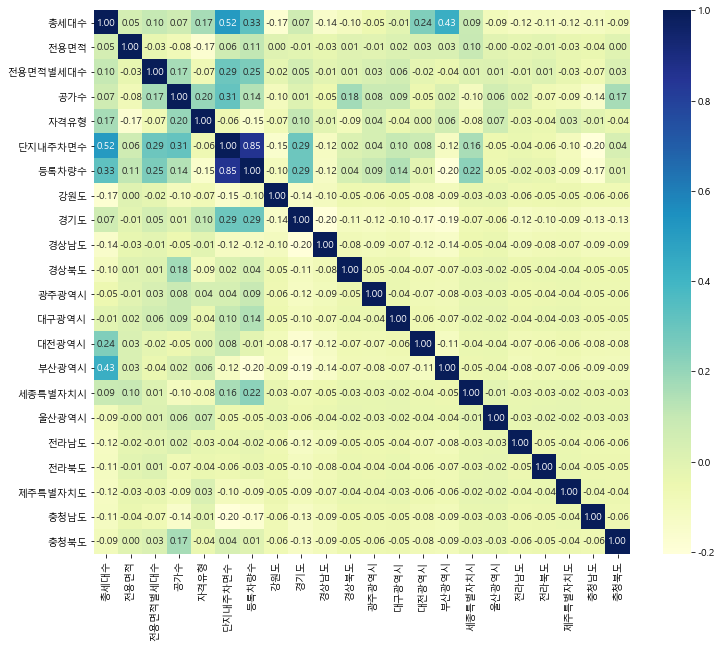

In [150]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f", cmap='YlGnBu')

In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   int32  
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

<AxesSubplot:xlabel='총세대수', ylabel='Count'>

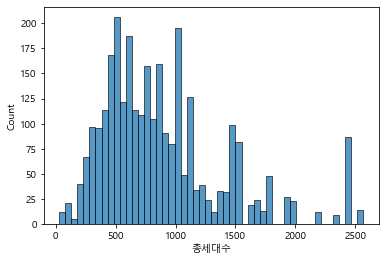

In [153]:
sns.histplot(x="총세대수", data=train, bins=50)

<AxesSubplot:xlabel='총세대수', ylabel='등록차량수'>

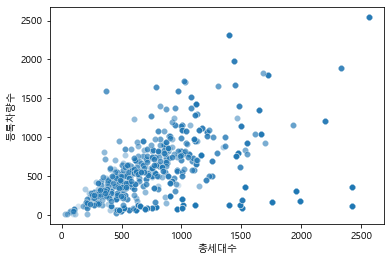

In [155]:
sns.scatterplot(x="총세대수", y="등록차량수", data=train, alpha=0.2)

In [157]:
train["임대건물구분"].value_counts()

아파트    2390
상가      562
Name: 임대건물구분, dtype: int64

<AxesSubplot:xlabel='임대건물구분', ylabel='Count'>

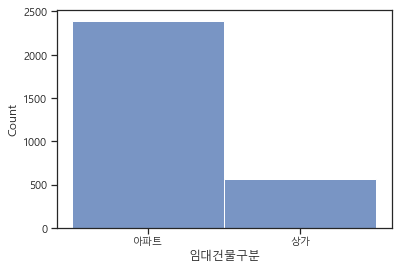

In [160]:
sns.histplot(x="임대건물구분", data=train)

<AxesSubplot:xlabel='임대건물구분', ylabel='등록차량수'>

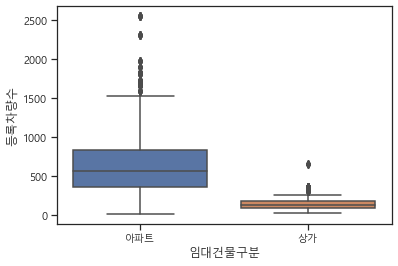

In [163]:
sns.boxplot(x="임대건물구분", y="등록차량수", data=train)

<AxesSubplot:xlabel='지역', ylabel='Count'>

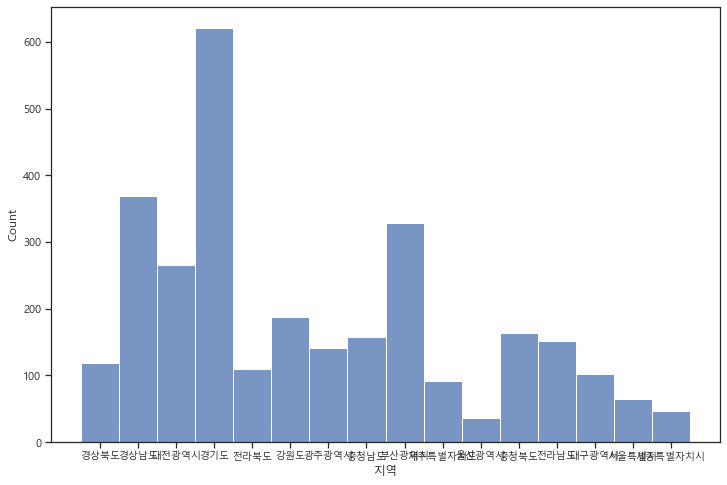

In [167]:
plt.figure(figsize=(12, 8))
sns.histplot(x="지역", data=train)

<AxesSubplot:xlabel='지역', ylabel='등록차량수'>

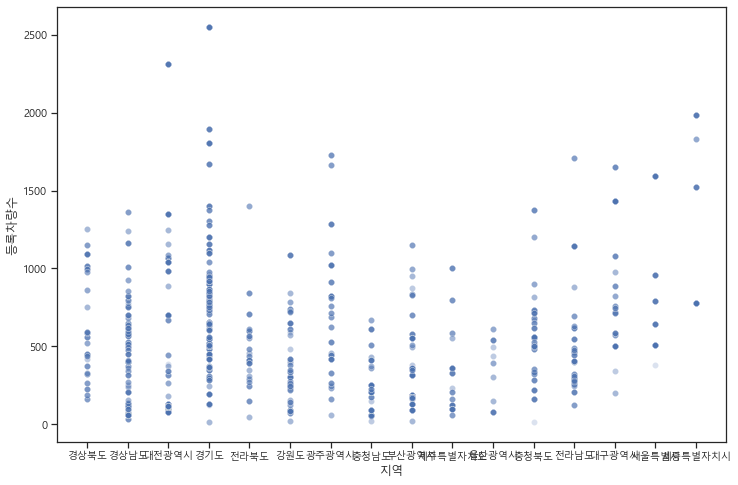

In [170]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="지역", y="등록차량수", data=train, alpha=0.2)

<AxesSubplot:xlabel='공급유형', ylabel='Count'>

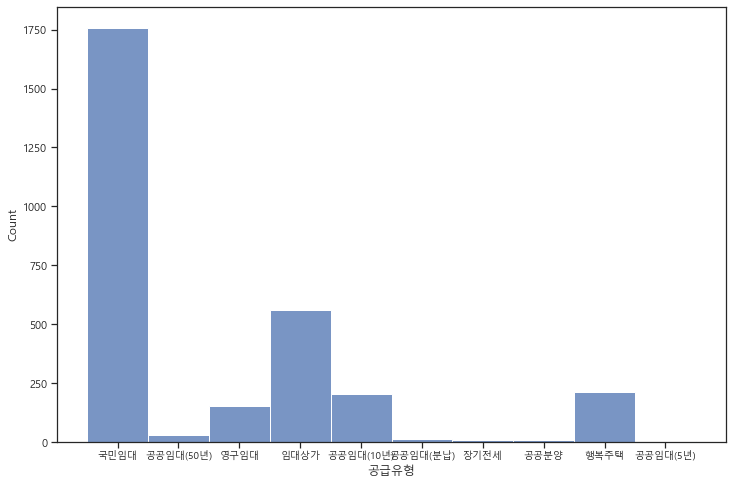

In [172]:
plt.figure(figsize=(12, 8))
sns.histplot(x="공급유형", data=train)

<AxesSubplot:xlabel='등록차량수', ylabel='Count'>

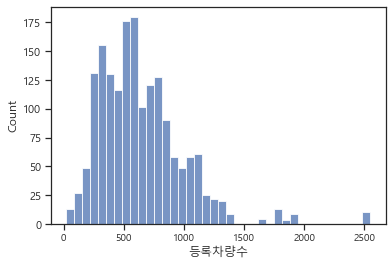

In [174]:
train_national_rent = train[train["공급유형"] == "국민임대"]
sns.histplot(x="등록차량수", data=train_national_rent)

<AxesSubplot:xlabel='등록차량수', ylabel='Count'>

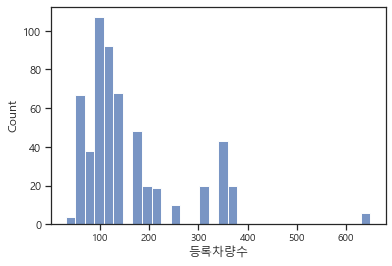

In [175]:
train_store_rent = train[train["공급유형"] == "임대상가"]
sns.histplot(x="등록차량수", data=train_store_rent)

<AxesSubplot:xlabel='전용면적', ylabel='Count'>

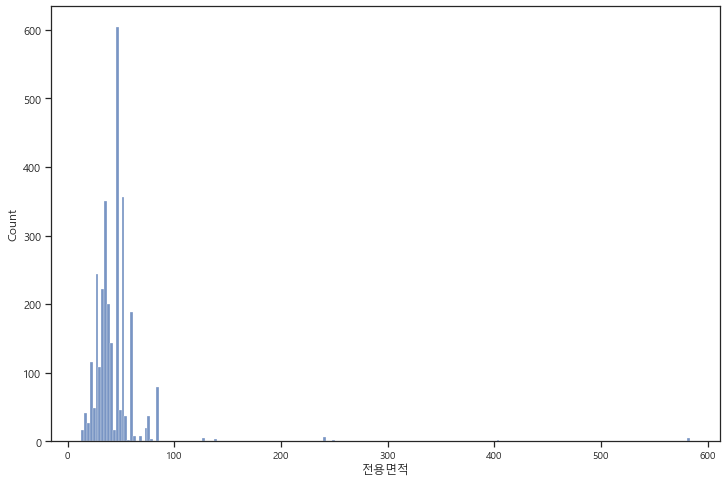

In [177]:
plt.figure(figsize=(12, 8))
sns.histplot(x="전용면적", data=train)

<AxesSubplot:xlabel='등록차량수', ylabel='Count'>

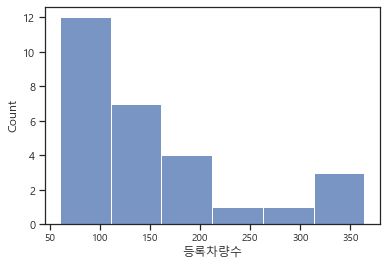

In [187]:
sns.histplot(train[train["전용면적"] >= 100]["등록차량수"])

<AxesSubplot:xlabel='등록차량수', ylabel='Count'>

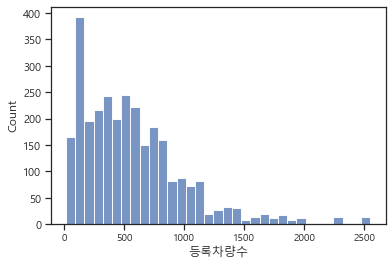

In [189]:
sns.histplot(train[train["전용면적"] < 100]["등록차량수"])

<AxesSubplot:xlabel='단지내주차면수', ylabel='Count'>

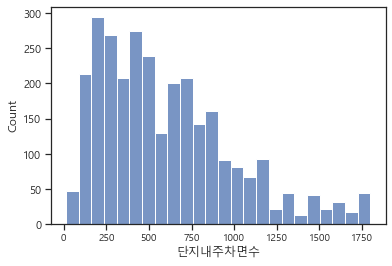

In [190]:
sns.histplot(x="단지내주차면수", data=train)

<AxesSubplot:xlabel='단지내주차면수', ylabel='등록차량수'>

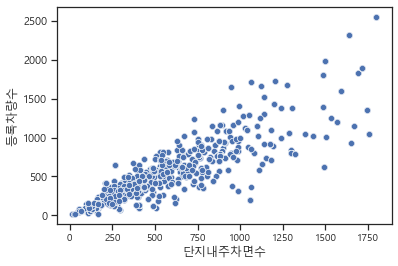

In [191]:
sns.scatterplot(x="단지내주차면수", y="등록차량수", data=train)

In [210]:
rent_deposit_notna = train[train["임대보증금"].notna()]
# rent_deposit_notna["임대보증금"] = rent_deposit_notna["임대보증금"].astype(int)
index_to_drop = rent_deposit_notna[rent_deposit_notna["임대보증금"] == "-"].index
rent_deposit_after = rent_deposit_notna.drop(index=index_to_drop, axis=0)
rent_deposit_after["임대보증금"] = rent_deposit_after["임대보증금"].astype(int)

<AxesSubplot:xlabel='임대보증금', ylabel='등록차량수'>

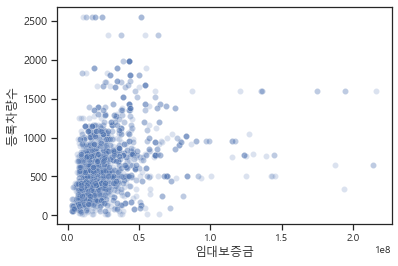

In [212]:
sns.scatterplot(x="임대보증금", y="등록차량수", data=rent_deposit_after, alpha=0.2)

In [216]:
bool_place_type = pd.get_dummies(train["임대건물구분"])
train_bool_place = pd.concat([train, bool_place_type], axis=1).drop("임대건물구분", axis=1)

<AxesSubplot:xlabel='단지코드', ylabel='등록차량수'>

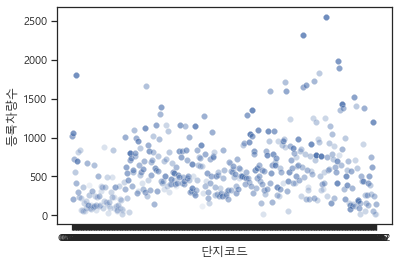

In [226]:
apart_only = train_bool_place[train_bool_place["아파트"]== 1]

sns.scatterplot(x="단지코드", y="등록차량수", data=apart_only, alpha=0.1)

In [242]:
train.groupby("단지코드").count()

,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
단지코드,,,,,,,,,,,,,,
C1000,7,7,7,7,7,7,7,7,7,7,7,7,7,7
C1004,19,19,19,19,19,19,19,19,2,2,0,19,19,19
C1005,3,3,3,3,3,3,3,3,3,3,0,3,3,3
C1013,5,5,5,5,5,5,5,5,5,5,5,5,5,5
C1014,7,7,7,7,7,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2663,6,6,6,6,6,6,6,6,6,6,6,6,6,6
C2666,6,6,6,6,6,6,6,6,6,6,6,6,6,6
C2670,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [246]:
c1004 = train.groupby("단지코드").get_group("C1004")
c1004

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
764,C1004,521,아파트,충청남도,영구임대,39.30,240,3.0,3,4682000,104180,NaN,2.0,153.0,93.0
765,C1004,521,아파트,충청남도,영구임대,39.69,264,3.0,3,4728000,105210,NaN,2.0,153.0,93.0
766,C1004,521,상가,충청남도,임대상가,19.00,1,3.0,4,NaN,NaN,NaN,2.0,153.0,93.0
767,C1004,521,상가,충청남도,임대상가,14.10,1,3.0,4,NaN,NaN,NaN,2.0,153.0,93.0
768,C1004,521,상가,충청남도,임대상가,19.31,1,3.0,4,NaN,NaN,NaN,2.0,153.0,93.0
769,C1004,521,상가,충청남도,임대상가,21.19,1,3.0,4,NaN,NaN,NaN,2.0,153.0,93.0
770,C1004,521,상가,충청남도,임대상가,21.19,1,3.0,4,NaN,NaN,NaN,2.0,153.0,93.0
771,C1004,521,상가,충청남도,임대상가,22.95,1,3.0,4,NaN,NaN,NaN,2.0,153.0,93.0
772,C1004,521,상가,충청남도,임대상가,23.40,1,3.0,4,NaN,NaN,NaN,2.0,153.0,93.0
773,C1004,521,상가,충청남도,임대상가,23.40,1,3.0,4,NaN,NaN,NaN,2.0,153.0,93.0


In [247]:
c1004["전용면적별세대수"].sum(axis=0)

521

In [251]:
# Nan 값을 0으로 처리 할 것! 역이 존재하지 않는다.
train[train["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].isnull()]["지역"].value_counts()

충청남도     114
대전광역시     93
경상남도       4
Name: 지역, dtype: int64

In [253]:
# Nan 값을 0으로 처리 할 것! 버스 정류장이 없는 것으로 확인 할 수 있다.
train[train["도보 10분거리 내 버스정류장 수"].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),74.97,80,15.0,1,46000000,456000,NaN,NaN,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),84.95,124,15.0,1,57000000,462000,NaN,NaN,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),84.96,289,15.0,1,57000000,462000,NaN,NaN,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),84.98,82,15.0,1,57000000,462000,NaN,NaN,1066.0,855.0


<AxesSubplot:xlabel='등록차량수', ylabel='Count'>

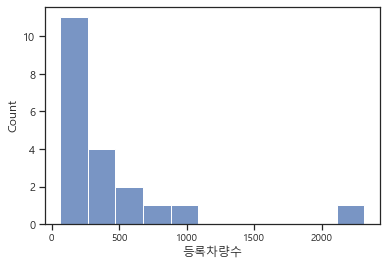

In [296]:
no_subway = train[train["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].isnull()]["등록차량수"].value_counts()
no_subway = no_subway.reset_index()
no_subway = no_subway.rename(columns={"index":"등록차량수", "등록차량수":"count"})
sns.histplot(x="등록차량수", data=no_subway)

<AxesSubplot:xlabel='등록차량수', ylabel='Count'>

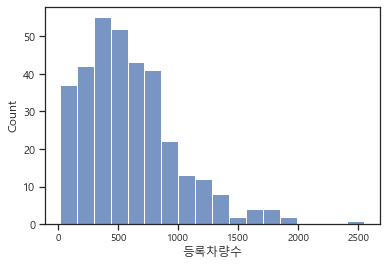

In [298]:
yes_subway = train[train["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].notnull()]["등록차량수"].value_counts()
yes_subway = yes_subway.reset_index()
yes_subway = yes_subway.rename(columns={"index":"등록차량수", "등록차량수":"count"})
sns.histplot(x="등록차량수", data=yes_subway)

In [307]:
train[train["임대보증금"].isnull()]["단지코드"].value_counts()

C1439    45
C2132    43
C1859    35
C1790    30
C2597    29
C1874    27
C2034    26
C1109    20
C2289    20
C2310    20
C1875    19
C1616    19
C2135    17
C2258    17
C2038    17
C1004    17
C2190    17
C2109    15
C1775    15
C1704    15
C2571    13
C2212    11
C1983    10
C1056    10
C2621    10
C1206    10
C2416     8
C1350     7
C1476     6
C1722     6
C1698     4
C1899     4
C1925     4
C2644     3
Name: 단지코드, dtype: int64

In [312]:
train.groupby("단지코드").get_group("C2132")

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
522,C2132,2428,아파트,부산광역시,영구임대,26.37,358,1.0,6,3912000,67260,0.0,1.0,756.0,359.0
523,C2132,2428,아파트,부산광역시,영구임대,26.37,1192,1.0,6,3912000,67260,0.0,1.0,756.0,359.0
524,C2132,2428,아파트,부산광역시,영구임대,31.32,239,1.0,3,6873000,94990,0.0,1.0,756.0,359.0
525,C2132,2428,아파트,부산광역시,영구임대,31.32,596,1.0,6,4646000,79890,0.0,1.0,756.0,359.0
526,C2132,2428,상가,부산광역시,임대상가,15.00,1,1.0,4,NaN,NaN,0.0,1.0,756.0,359.0
527,C2132,2428,상가,부산광역시,임대상가,15.00,1,1.0,4,NaN,NaN,0.0,1.0,756.0,359.0
528,C2132,2428,상가,부산광역시,임대상가,38.00,1,1.0,4,NaN,NaN,0.0,1.0,756.0,359.0
529,C2132,2428,상가,부산광역시,임대상가,38.00,1,1.0,4,NaN,NaN,0.0,1.0,756.0,359.0
530,C2132,2428,상가,부산광역시,임대상가,16.57,1,1.0,4,NaN,NaN,0.0,1.0,756.0,359.0
531,C2132,2428,상가,부산광역시,임대상가,18.38,1,1.0,4,NaN,NaN,0.0,1.0,756.0,359.0
